In [1]:
from __future__ import print_function
import numpy as np
import scipy as sp

In [2]:
>>> def pend(y, t):
...     global b, c
...     theta, omega = y
...     dydt = [omega, -b*omega - c*np.sin(theta)]
...     return dydt

In [3]:
>>> b = np.asarray((0.25))
>>> c = np.asarray((5.0))
>>> y0 = [np.pi - 0.1, 0.0]
>>> t = np.linspace(0, 10, 1000)
>>> from scipy.integrate import odeint
>>> sol = odeint(pend, y0, t)#, args=(b, c))
theta, omega = sol[:,0], sol[:,1]

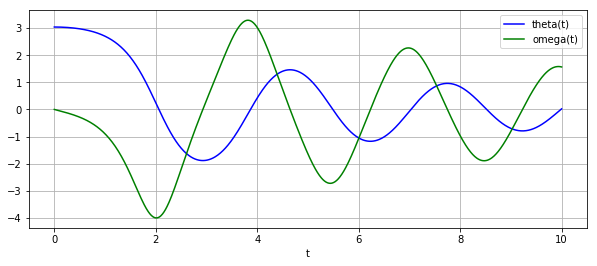

In [4]:
>>> import matplotlib.pyplot as plt
>>> plt.plot(t, sol[:, 0], 'b', label='theta(t)')
>>> plt.plot(t, sol[:, 1], 'g', label='omega(t)')
>>> plt.legend(loc='best')
>>> plt.xlabel('t')
>>> plt.grid()
plt.gcf().set_size_inches(10,4)
>>> plt.show()

In [5]:
from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)


In [6]:
help(norm.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(self, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
    random_state : None or int or ``np.random.RandomState`` instance, optional
        If int or RandomState, use it for drawing the random variates.
        If None, rely on ``self.random_state``.
        Default is None.
    
    Returns
    -------
    rvs : ndarray or scalar
        Random variates of given `size`.



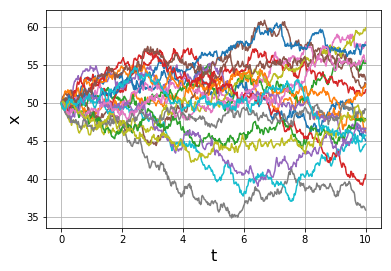

In [7]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 20
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

In [9]:
a = np.array([1,2,3,4])
at = a.T
print(a, at)

[1 2 3 4] [1 2 3 4]


In [79]:
state = np.zeros((100, 3, 1))
a = np.array([[1,1,1]])
for i in range(100):
    state[i,:,:].fill(i)
#     if i < 5:
#         print('state at ', i, '\n', state[i])

print('\nstate up to 4: ', '\n', state[99:,:,:])
cost = np.sum(a*(state[91,:,:] ** 2) , axis=0)
print('cost \n', cost, cost.shape)

# print(state[:4, :,:] ** 2)
# cost_sum = 0
# for i in range(4):
#     cost_sum += (state[i,:,:].T.dot(state[i,:,:]))
# print('cost_sum: ', cost_sum)


state up to 4:  
 [[[99.]
  [99.]
  [99.]]]
cost 
 [24843. 24843. 24843.] (3,)


In [101]:
# simulate covariance vector of change in control law at every time step
T = 100
covar = np.zeros((T))
for i in range(T):
    covar[i] = (state[i] - np.mean(state[i])).T.dot(state[i] - np.mean(state[i]))

state:  [[0.]
 [0.]
 [0.]]
covar:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [125]:
help(np.tile)

Help on function tile in module numpy.lib.shape_base:

tile(A, reps)
    Construct an array by repeating A the number of times given by reps.
    
    If `reps` has length ``d``, the result will have dimension of
    ``max(d, A.ndim)``.
    
    If ``A.ndim < d``, `A` is promoted to be d-dimensional by prepending new
    axes. So a shape (3,) array is promoted to (1, 3) for 2-D replication,
    or shape (1, 1, 3) for 3-D replication. If this is not the desired
    behavior, promote `A` to d-dimensions manually before calling this
    function.
    
    If ``A.ndim > d``, `reps` is promoted to `A`.ndim by pre-pending 1's to it.
    Thus for an `A` of shape (2, 3, 4, 5), a `reps` of (2, 2) is treated as
    (1, 1, 2, 2).
    
    Note : Although tile may be used for broadcasting, it is strongly
    recommended to use numpy's broadcasting operations and functions.
    
    Parameters
    ----------
    A : array_like
        The input array.
    reps : array_like
        The number of rep

In [127]:
np.tile(10, 3).shape

(3,)

In [134]:
x = np.array([4, 8, 10])
lx = np.array((1, 2, 3))
res = np.divide(1, x)
print(lx.shape, res)

(3,) [0 0 0]


In [137]:
luu = np.tile(np.diag(np.array([1,2,3]) ), [1, 1])
luu

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [139]:
action_penalty = np.array([1,2,3])
luu = np.tile(np.diag(action_penalty), 1)
luu

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])